---

### **1. Import Module**

In [1]:
import os
import glob
import shutil
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

---

### **2. Define Function : Image Crop (circular crop)**

In [2]:
# 이미지 폴더 경로 설정
image_folder_path = './00_modified_dataset/'

# 이미지를 받아 Crop
def crop_images(query):
    set_image_folder = image_folder_path + str(query) + '/'
    # 이미지 파일 목록 가져오기
    image_files = glob.glob(os.path.join(set_image_folder, '*.jpg'))
    # 저장할 폴더 경로
    save_folder = './01_cropped_images_circular/' + str(query) + '/'
    os.makedirs(save_folder, exist_ok=True)

    for image_path in image_files:
        # 이미지 불러오기
        image = Image.open(image_path)

        # 원 모양의 크롭 영역 생성
        center_x, center_y = image.width // 2, image.height // 2
        radius = min(center_x, center_y)  # 반지름을 이미지 크기의 최소 길이의 절반으로 설정
        mask = Image.new('L', image.size, 0)
        draw = ImageDraw.Draw(mask)
        draw.ellipse((center_x - radius, center_y - radius, center_x + radius, center_y + radius), fill=255)
        cropped_image = Image.composite(image, Image.new('RGB', image.size), mask)

        # 이미지 저장 (파일명은 원본 파일명과 동일)
        save_path = os.path.join(save_folder, os.path.basename(image_path))
        cropped_image.save(save_path)

    print(f'01_cropped_images[{query}]에 저장 완료.')

In [3]:
for i in range(3):
    crop_images(i)

01_cropped_images[0]에 저장 완료.
01_cropped_images[1]에 저장 완료.
01_cropped_images[2]에 저장 완료.


---

### **3. Define Function : Image Crop (Square Crop)**

In [4]:
input_folder = './01_cropped_images_circular/'

new_width, new_height = 1934, 1934

def crop_images_in_folder(query):
    # 입력 폴더에서 이미지 파일 목록 가져오기
    set_image_folder = input_folder + str(query) + '/'
    image_files = glob.glob(os.path.join(set_image_folder, '*.jpg'))

    save_folder = './02_cropped_images_square/' + str(query) + '/'
    os.makedirs(save_folder, exist_ok=True)

    # 출력 폴더가 없으면 생성
    os.makedirs(save_folder, exist_ok=True)

    for image_path in image_files:
        # 이미지 열기
        image = Image.open(image_path)

        # 이미지 크기 조정
        left = (image.width - new_width) / 2
        right = (image.width + new_width) / 2
        top = 0
        bottom = new_height

        # 이미지 자르기
        cropped_image = image.crop((left, top, right, bottom))

        # 이미지 저장 (파일명은 원본 파일명과 동일)
        filename = os.path.basename(image_path)
        output_image_path = os.path.join(save_folder, filename)
        cropped_image.save(output_image_path)

        # 이미지 닫기
        image.close()

    print(f"{input_folder} 폴더 내의 이미지를 {new_width}x{new_height}로 크롭하여 {save_folder}에 저장하였습니다.")

In [5]:
for i in range(3):
    crop_images_in_folder(i)

./01_cropped_images_circular/ 폴더 내의 이미지를 1934x1934로 크롭하여 ./02_cropped_images_square/0/에 저장하였습니다.
./01_cropped_images_circular/ 폴더 내의 이미지를 1934x1934로 크롭하여 ./02_cropped_images_square/1/에 저장하였습니다.
./01_cropped_images_circular/ 폴더 내의 이미지를 1934x1934로 크롭하여 ./02_cropped_images_square/2/에 저장하였습니다.


---

### **4. Define Function : Rotate and Save**

In [0]:
# 이미지를 회전시키고 저장할 함수
def rotate_and_save_image(input_path, output_folder):
    try:
        # 이미지 열기
        image = Image.open(input_path)

        # 360도를 24등분하여 15도씩 회전하면서 이미지 저장
        for i in range(24):
            angle = i * 15
            rotated_image = image.rotate(angle)

            # 회전된 이미지 파일명 설정
            base_filename = os.path.splitext(os.path.basename(input_path))[0]
            output_filename = f"{base_filename}_{angle}.jpg"
            output_path = os.path.join(output_folder, output_filename)

            # 회전된 이미지 저장
            rotated_image.save(output_path)
            rotated_image.close()
        # 원본 이미지 파일 닫기
        image.close()

    except Exception as e:
        print(f"오류 발생: {e}")

In [6]:
def save_images(query):
    # 입력 폴더와 출력 폴더 지정
    input_folder = "./02_cropped_images_square/" + str(query) + '/'
    os.makedirs(input_folder, exist_ok=True)
    output_folder = "./03_rotated_images/" + str(query) + '/'
    os.makedirs(output_folder, exist_ok=True)
    
    # 입력 폴더 내의 이미지 파일 목록 가져오기
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
    
    # 각 이미지를 15도씩 돌려서 24개의 이미지 생성
    for image_file in image_files:
        input_path = os.path.join(input_folder, image_file)
        rotate_and_save_image(input_path, output_folder)

    print(f"{input_folder}에서 각 이미지마다 24개의 이미지를 생성하여 {output_folder}에 저장되었습니다.")

In [10]:
for i in range(3):
    save_images(i)

./02_cropped_images_square/0/RET027OD.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET028OD.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET028OS.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET029OD.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET029OS.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET030OD.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET030OS.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET031OD.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET031OS.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET032OD.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0/에 저장되었습니다.
./02_cropped_images_square/0/RET032OS.jpg에서 24개의 이미지를 생성하여 ./03_rotated_images/0

---

### **5. Define Function : Data Shuffle and Divide Train&Test**

In [11]:
rotated_img_path = './03_rotated_images/'

def data_shuffle(query):
    shuffled_path = rotated_img_path + str(query) + '/'
    # 이미지 파일 목록 가져오기
    image_files = glob.glob(os.path.join(shuffled_path, '*.jpg'))
    # 이미지 파일 목록을 numpy 배열로 변환
    image_files = np.array(image_files)
    # 이미지 파일 목록 섞기 (랜덤화)
    np.random.shuffle(image_files)

    # 추출할 이미지 개수 설정
    num_images_to_extract = 1320
    
    # 이미지 파일 목록에서 무작위로 선택하여 train과 test로 나누기
    selected_indices = np.random.choice(len(image_files), num_images_to_extract, replace=False)
    train_images = selected_indices[:int(0.8 * num_images_to_extract)]
    test_images = selected_indices[int(0.8 * num_images_to_extract):]

    # train 이미지를 저장할 디렉토리 설정
    train_folder = './dataset/train/' + str(query) + '/'
    os.makedirs(train_folder, exist_ok=True)

    # test 이미지를 저장할 디렉토리 설정
    test_folder = './dataset/test/' + str(query) + '/'
    os.makedirs(test_folder, exist_ok=True)

    # train 이미지를 train 폴더에 복사
    os.makedirs(train_folder, exist_ok=True)
    for index in train_images:
        image_file = image_files[index]
        shutil.copy(image_file, os.path.join(train_folder, os.path.basename(image_file)))
    
    # test 이미지를 test 폴더에 복사
    os.makedirs(test_folder, exist_ok=True)
    for index in test_images:
        image_file = image_files[index]
        shutil.copy(image_file, os.path.join(test_folder, os.path.basename(image_file)))

    return train_images, test_images

In [12]:
for i in range(3):
    train_images, test_images = data_shuffle(i)

---

### **6. Image Visualization**

In [15]:
# 이미지 폴더 경로 설정
image_folder = './dataset/train/'  # 적절한 경로로 변경하세요.
def img_show(query):
    img_show_path = image_folder + str(query) + '/'
    # 이미지 파일 목록 가져오기
    image_files = glob.glob(os.path.join(img_show_path, '*.jpg'))

    # 무작위로 4개의 이미지 인덱스 선택
    np.random.seed(42)  # 랜덤 시드를 고정하여 재현성 확보
    selected_indices = np.random.choice(len(image_files), 4, replace=False)

    # 선택된 이미지 시각화
    plt.figure(figsize=(12, 4))  # 그래프 크기 조절 (선택적)
    for i, idx in enumerate(selected_indices):
        image_path = image_files[idx]
        # 이미지 불러오기
        image = Image.open(image_path)
        # 파일 이름 추출
        file_name = os.path.basename(image_path)

        # subplot 추가
        plt.subplot(1, 4, i + 1)  # 1행 4열의 서브플롯
        plt.imshow(image)
        plt.title(f'[{query}] Image{i + 1}\n{file_name}')  # 파일 이름 함께 표시
        plt.axis('off')  # 축 숨기기

    plt.show()

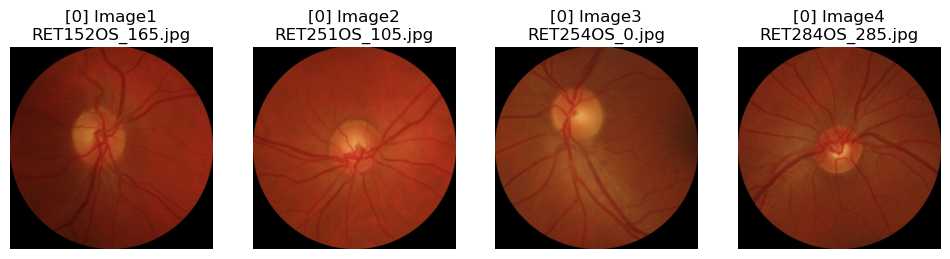

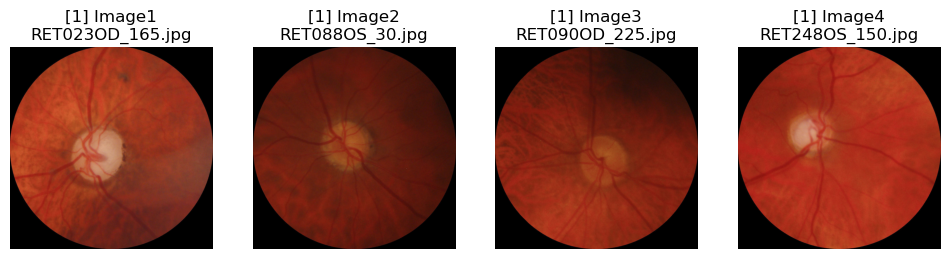

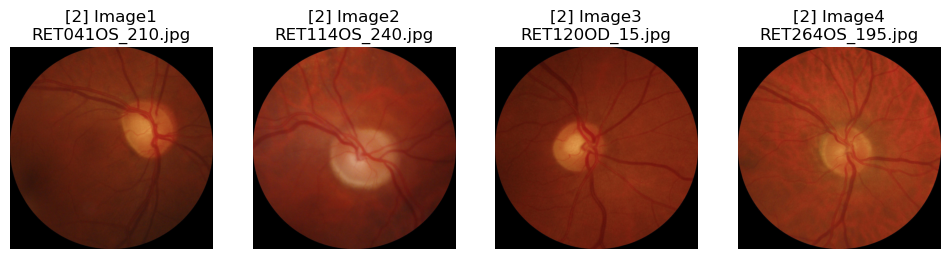

In [16]:
for i in range(3):
    img_show(i)

---